<a href="https://colab.research.google.com/github/Steve-YJ/Explore-Kaggle/blob/master/%5BPipeline%5D_Simple_model_works_fine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple model works fine
* reference: https://www.kaggle.com/choonje/simple-model-works-fine



"복잡한 모델만이 항상 올바른 것은 아닙니다."
<br>
Kaggle KR Notebook 참고<br>

1. voting classifier 이외에 다른 앙상블 모델을 적용시켜 볼 것

2. hyper parameter engineering

3. feature engineering

50%만 채점하는 이번 컴피티션의 특성상 95%이상의 accuracy는 over-fitting일 수도 있음

I made some changes in this codeline. I'll update my annotation but basically this model is ensanbled model.

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [5]:
%cd drive/My\ Drive/Kaggle-DataScience/Explore-Kernels/data/titanic

/content/drive/My Drive/Kaggle-DataScience/Explore-Kernels/data/titanic


In [6]:
! ls

test.csv  train.csv


## Import Library

In [1]:
import numpy as np
import pandas as pd

## Data Preparation

In [34]:
# 데이터 준비 파트
train_data = pd.read_csv('./train.csv')
test_val = pd.read_csv('./test.csv')

print(train_data.shape, test_val.shape)

(891, 12) (418, 11)


In [35]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Feature Engineering
* 모델이 학습할 수 있도록 데이터를 준비하고
* Feature를 선별하는 단계
* category value -> numeric part(직접해보기!)

In [37]:
print(train_data.iloc[1:11])
for i in range(891):
    temp = train_data.iloc[i, 11]
    if temp == "S":
        train_data.iloc[i, 11]=0
    elif temp == "C":
        train_data.iloc[i, 11] = 1
    elif temp == "Q":
        train_data.iloc[i, 11] = 2

train_data.head()

    PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
1             2         1       1  ...  71.2833   C85         C
2             3         1       3  ...   7.9250   NaN         S
3             4         1       1  ...  53.1000  C123         S
4             5         0       3  ...   8.0500   NaN         S
5             6         0       3  ...   8.4583   NaN         Q
6             7         0       1  ...  51.8625   E46         S
7             8         0       3  ...  21.0750   NaN         S
8             9         1       3  ...  11.1333   NaN         S
9            10         1       2  ...  30.0708   NaN         C
10           11         1       3  ...  16.7000    G6         S

[10 rows x 12 columns]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


`많이 실수하는 부분 중 하나`<br>

train_set 변경시 test_set의 value도 같이 바꿔줘야함

In [38]:
for i in range(418):
    temp = test_val.iloc[i, 10]
    if temp == "S":
        test_val.iloc[i, 10] = 0
    if temp == "C":
        test_val.iloc[i, 10] = 1
    if temp == "Q":
        test_val.iloc[i, 10] = 2

test_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,0


In [39]:
train_data.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [40]:
train_data.Name = train_data.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,0


In [41]:
test_val.Name = test_val.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
test_val.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.5,0,0,330911,7.8292,NaN,2
1,893,3,Mrs,female,47.0,1,0,363272,7.0000,NaN,0
2,894,2,Mr,male,62.0,0,0,240276,9.6875,NaN,2
3,895,3,Mr,male,27.0,0,0,315154,8.6625,NaN,0
4,896,3,Mrs,female,22.0,1,1,3101298,12.2875,NaN,0


In [44]:
train_data.Name.unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [46]:
dummy = []
Mr = ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']
Mrs = ['the Countess', 'Mme', 'Lady']
Miss = ['Mlle', 'Ms']

for i in range(891):
    temp = train_data.iloc[i, 3]

    if temp in Mr:
        train_data.iloc[i, 3] = "Mr"
    elif temp in Mrs:
        train_data.iloc[i, 3] = "Mrs"
    elif temp in Miss:
        train_data.iloc[i, 3] = "Miss"
    elif temp == "Dr":
        if train_data.iloc[i, 4] == "male":
            train_data.iloc[i, 3] = "Mr"
        else: 
            train_data.iloc[i, 3] = "Mrs"

    else:
        dummy.append(temp)
        pass

print(set(dummy))

{'Miss', 'Mrs', 'Mr', 'Master'}


In [47]:
dummy=[]
Mr = ['Capt', 'Col', 'Don', 'Jonkheer', 'Major', 'Rev', 'Sir']
Mrs = ['the Countess', 'Mme', 'Lady']
Miss = ['Mlle', 'Ms']

for i in range(418):
    temp = test_val.iloc[i,2]
    if temp in Mr:
        test_val.iloc[i,2]="Mr"
    elif temp in Mrs:
        test_val.iloc[i,2]="Mrs"
    elif temp in Miss :
        test_val.iloc[i,2]="Miss"
    elif temp =='Dr':
        if test_val.iloc[i,3]=="male":
            test_val.iloc[i,2]="Mr"
        else:
            test_val.iloc[i,2]="Mrs"
    elif temp =="Dona":
        test_val.iloc[i,2]="Mrs"
    else:
        dummy.append(temp)
        pass

print(set(dummy))

train_data.head()

{'Miss', 'Mrs', 'Mr', 'Master'}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,NaN,0


* `LabelEncoder` 모듈을 사용하면 전처리 작업을 더 쉽게 할 수 있다.

In [49]:
import numpy as np  # for linear algebra
from sklearn.preprocessing import LabelEncoder

import pandas as pd  # data processing
from sklearn.model_selection import train_test_split

# Label encoder를 활용하면 위의 작업을 더 쉽게 할 수 있음
Label_encoder = LabelEncoder()
Label_encoder.fit(train_data.Sex)
train_data.loc[:, 'Sex'] = Label_encoder.transform(train_data.Sex)
test_val.loc[:, 'Sex'] = Label_encoder.transform(test_val.Sex)

# NA value를 채우기 위해 더미 변수 생성
dummy_age = round(train_data.Age.mean(), 1)
print(dummy_age)

29.7


In [50]:
label_encoder = LabelEncoder()
label_encoder.fit(train_data.Name)
train_data.loc[:, 'Name'] = label_encoder.transform(train_data.Name)
test_val.loc[:, 'Name'] = label_encoder.transform(test_val.Name)
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,3,0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,3,0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,2,1,35.0,0,0,373450,8.0500,NaN,0


In [53]:
from sklearn import preprocessing
# 나이 변수는 중요하므로?? scaling 해준다
train_data.loc[:, 'Age'] = train_data.Age.fillna(dummy_age) # Fill NA/NaN values using the specified method.
test_val.loc[:, 'Age'] = test_val.Age.fillna(dummy_age)

# NA가 2개인 'Embarked'변수의 missing value를 채워준다
train_data.loc[:, 'Embarked'] = train_data.Embarked.fillna(2)
test_val.loc[:, 'Embarked'] = test_val.Embarked.fillna(2)

Do-it! 'Fare'를 채워보자

In [55]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,2,1,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,3,0,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,1,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,3,0,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,2,1,35.0,0,0,373450,8.0500,NaN,0


In [57]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

'Cabin' column을 날리면 좋겠죠?<br>
우선은 뒤의 튜토리얼을 이어서 해본다!

In [59]:
X = train_data.loc[:, ['Age', 'Sex', 'Pclass', 'Embarked', 'SibSp']]
Y = train_data.loc[:, 'Survived']
XTest = test_val.loc[:,['Age', 'Sex', 'Pclass', 'Embarked', 'SibSp']]

count_nan = len(Y) - Y.count()
count_nan = len(X) - X.count()

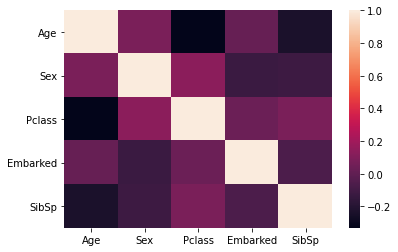

In [60]:
import seaborn as sns

corr = X.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [61]:
# Train/Val/Test는 6:2:2 비율이 좋으나 이미 test셋을 나눴기에
# 본 튜토리얼에서는 test_size를 20%로 설정한다
from sklearn.model_selection import train_test_split
XTrain, XValid, YTrain, YValid = train_test_split(X, Y, test_size=0.33)

In [62]:
from sklearn.linear_model import LogisticRegression
from subprocess import check_output
from sklearn.ensemble import RandomForestClassifier, VotingClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, neighbors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier


model1 = svm.LinearSVC()
model2 = neighbors.KNeighborsClassifier()
model3 =RandomForestClassifier()
model4 =LogisticRegression()
model5 =LinearDiscriminantAnalysis()
model6 = DecisionTreeClassifier()
model7 = MLPClassifier()
model8 = ExtraTreesClassifier()
model9 = AdaBoostClassifier()
model10 = GradientBoostingClassifier()
model11 =XGBClassifier(Eta=0.2)



clf = VotingClassifier(estimators=[
                        ('lsvc', model1),  #0.78 0.78
                        ('knn', model2), #0.75 #0.85
                        ('rfor', model3), #0.8 #0.81
                        ('lr', model4), #0.8 #0.78
                        ('lda', model5), #0.78 #0.77
                        ('dc', model6), #0.81 #0.82
                        ('mlpc', model7), #0.78 #0.8
                        ('etc', model8), #0.78 #0.81
                        ('abc', model9), #0.8 #0.81
                        ("gbc",model10), #0.76 #0.8/
                        ("XG",model11) #0.81
                                ])
clf.fit(XTrain, YTrain)


confidence = clf.score(XValid, YValid)
print('accuracy:',confidence)
predictions = clf.predict(XTest)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


accuracy: 0.8508474576271187


In [63]:
# 이제 우리가 제출할 부분
y_pred_test = clf.predict(XTest)
print(y_pred_test)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


제출

In [66]:
sub = pd.DataFrame({'PassengerId': test_val['PassengerId'],
                    'Survived': predictions})
sub.to_csv('./scikitLRExample.csv', index=False)

In [67]:
sub.to_csv('./scikitLRExample2.csv')